In [1]:
import numpy as np
import pandas as pd

In [8]:
#loading life satisfaction data
life_satisfaction = pd.read_csv('oecd_bli.csv', thousands=',')
life_satisfaction.set_index('Country', inplace=True)
life_satisfaction.head()

,Life satisfaction
Country,
Australia,7.3
Austria,6.9
Belgium,6.9
Brazil,7.0
Canada,7.3


In [6]:
#loading gpd_per_capita data
gdp_per_capita = pd.read_csv('gdp_per_capita.csv', thousands=',')
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,GDP per capita
Country,
Afghanistan,599.994
Albania,3995.383
Algeria,4318.135
Angola,4100.315
Antigua and Barbuda,14414.302


In [9]:
#Merging datasets
country_stats = pd.merge(left=life_satisfaction, right=gdp_per_capita, left_index=True, right_index=True)
country_stats

,Life satisfaction,GDP per capita
Country,,
Australia,7.3,50961.865
Austria,6.9,43724.031
Belgium,6.9,40106.632
Brazil,7.0,8669.998
Canada,7.3,43331.961
Chile,6.7,13340.905
Czech Republic,6.5,17256.918
Denmark,7.5,52114.165
Estonia,5.6,17288.083


In [11]:
#Sorting Merged datasets
country_stats.sort_values(by="GDP per capita", inplace=True)
country_stats

,Life satisfaction,GDP per capita
Country,,
Brazil,7.0,8669.998
Mexico,6.7,9009.280
Russia,6.0,9054.914
Turkey,5.6,9437.372
Hungary,4.9,12239.894
Poland,5.8,12495.334
Chile,6.7,13340.905
Slovak Republic,6.1,15991.736
Czech Republic,6.5,17256.918


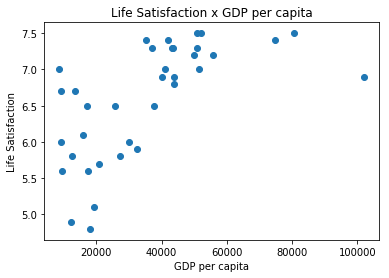

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(country_stats["GDP per capita"], country_stats['Life satisfaction'])
plt.title("Life Satisfaction x GDP per capita")
plt.xlabel("GDP per capita")
plt.ylabel("Life Satisfaction")
plt.show()

In [14]:
#Building a linear Regression Model
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

In [16]:
#Training the model
model.fit(np.c_[country_stats["GDP per capita"]], np.c_[country_stats['Life satisfaction']])

LinearRegression()

In [27]:
#Predict Instances

X = [country_stats["GDP per capita"].loc['Norway']]
print('Predito ', model.predict([X]))
print('Real')
country_stats.loc['Norway']

Predito  [[7.49720703]]
Real


Life satisfaction        7.400
GDP per capita       74822.106
Name: Norway, dtype: float64

In [28]:
#Predict New Instances
Argentina_Gdp_per_capita = [13789]
print(model.predict([Argentina_Gdp_per_capita]))

[[6.08262216]]
